In [1]:
import os
import pandas as pd
import numpy as np
import shutil
from shutil import copyfile


In [3]:
df = pd.read_csv("/kaggle/input/ham1000-segmentation-and-classification/GroundTruth.csv")
list_dirs = df.columns
list_dirs = list(list_dirs)

image_paths = []
split_dataset = '/kaggle/working/datsset'
images_dir = "/kaggle/input/ham1000-segmentation-and-classification/images"



os.makedirs(split_dataset , exist_ok =True)
x = df.iloc[:,0].values
y = df.iloc[:,1:].values


for item in list_dirs:
    print(item)
    os.makedirs(os.path.join(split_dataset,str(item)) , exist_ok = True)







for i in range(len(df)):
    image_path = os.path.join(images_dir,str(x[i])+".jpg")
    if df['MEL'][i] == 1 :
        new_path = os.path.join(split_dataset,"MEL",str(x[i])+".jpg")
        shutil.copyfile(image_path, new_path)
    elif df['NV'][i] == 1 :
        new_path = os.path.join(split_dataset,"NV",str(x[i])+".jpg")
        shutil.copyfile(image_path, new_path)
    elif df['BCC'][i] == 1 :
        new_path = os.path.join(split_dataset,"BCC",str(x[i])+".jpg")
        shutil.copyfile(image_path, new_path)
    elif df['AKIEC'][i] == 1 :
        new_path = os.path.join(split_dataset,"AKIEC",str(x[i])+".jpg")
        shutil.copyfile(image_path, new_path)
    elif df['BKL'][i] == 1 :
        new_path = os.path.join(split_dataset,"BKL",str(x[i])+".jpg")
        shutil.copyfile(image_path, new_path)
    elif df['DF'][i] == 1 :
        new_path = os.path.join(split_dataset,"DF",str(x[i])+".jpg")
        shutil.copyfile(image_path, new_path)
    elif df['VASC'][i] == 1 :
        new_path = os.path.join(split_dataset,"VASC",str(x[i])+".jpg")
        shutil.copyfile(image_path, new_path)
    
    

image
MEL
NV
BCC
AKIEC
BKL
DF
VASC


In [4]:
def dir_split(data_dir,new_dataset_dir):
    os.makedirs(new_dataset_dir , exist_ok =True)


    train_dir = os.path.join(new_dataset_dir, 'train')
    test_dir = os.path.join(new_dataset_dir , 'test')
    val_dir = os.path.join(new_dataset_dir, 'val')


    if not os.path.exists(train_dir):
        os.makedirs(train_dir)

    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    if not os.path.exists(val_dir):
        os.makedirs(val_dir)

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        dir_size = len(os.listdir(class_path))

        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)    
        val_class_dir = os.path.join(val_dir, class_name)    


        if not os.path.exists(train_class_dir):
            os.makedirs(train_class_dir)
        if not os.path.exists(test_class_dir):
            os.makedirs(test_class_dir)
        if not os.path.exists(val_class_dir):
            os.makedirs(val_class_dir)

        images = os.listdir(class_path)

        train_size = int(len(images)*0.6)
        test_size = int(len(images)*0.8)
        val_size = int(len(images))

        for i in range(train_size):
            copyfile(os.path.join(class_path, images[i]), os.path.join(train_class_dir, images[i]))

        for i in range(train_size,test_size):
            copyfile(os.path.join(class_path, images[i]), os.path.join(test_class_dir, images[i]))

        for i in range(test_size,val_size):
            copyfile(os.path.join(class_path, images[i]), os.path.join(val_class_dir, images[i]))





    return train_dir , test_dir , val_dir



In [7]:
def plot_metrics(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.title('Training and Validation accuracy Over Epochs')
    plt.legend()
    plt.show()

In [8]:
split_dataset = '/kaggle/working/test_train_dataset'

dataset = '/kaggle/working/datsset'
train_dir , test_dir , val_dir = dir_split(dataset , split_dataset)


In [11]:
os.rmdir("/kaggle/working/test_train_dataset/train/image")
os.rmdir("/kaggle/working/test_train_dataset/test/image")
os.rmdir("/kaggle/working/test_train_dataset/val/image")

In [6]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import DenseNet121


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision, Recall


from shutil import copyfile
import random
import cv2
from tqdm import tqdm
from scipy.stats import mode


2024-06-11 05:31:19.928142: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 05:31:19.928242: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 05:31:20.063305: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
img_width, img_height = 224, 224
batch_size = 32
epochs = 10
test_size = 0.2  

In [12]:

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)


val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


Found 6007 images belonging to 7 classes.
Found 2003 images belonging to 7 classes.
Found 2005 images belonging to 7 classes.


In [13]:

# Load ResNet50 model without the top layer
base_model1 = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top
x1 = base_model1.output
x1 = GlobalAveragePooling2D()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.5)(x1)
predictions1 = Dense(train_generator.num_classes, activation='softmax')(x1)

# Create model
model1 = Model(inputs=base_model1.input, outputs=predictions1)

# Freeze the layers of the base model
for layer in base_model1.layers:
    layer.trainable = False

# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(), Recall()])

# Callbacks
checkpoint = ModelCheckpoint('resnet50_best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history1 = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[checkpoint, early_stop])

# Evaluate the model
score1 = model1.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Validation Loss: {score1[0]}, Validation Accuracy: {score1[1]}")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/187 ━━━━━━━━━━━━━━━━━━━━ 1:09:25 22s/step - accuracy: 0.0312 - loss: 3.0075 - precision: 0.0000e+00 - recall: 0.0000e+00

I0000 00:00:1718084296.510417     286 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718084296.561998     286 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


149/187 ━━━━━━━━━━━━━━━━━━━━ 19s 507ms/step - accuracy: 0.5794 - loss: 1.4365 - precision: 0.6311 - recall: 0.4830

W0000 00:00:1718084371.569895     287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.5912 - loss: 1.4050 - precision: 0.6376 - recall: 0.4960

W0000 00:00:1718084390.556865     287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 129s 573ms/step - accuracy: 0.5914 - loss: 1.4043 - precision: 0.6378 - recall: 0.4963 - val_accuracy: 0.6704 - val_loss: 1.1311 - val_precision: 0.6704 - val_recall: 0.6704
Epoch 2/10
  1/187 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.7812 - loss: 1.1013 - precision: 0.7667 - recall: 0.7188

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7812 - loss: 1.1013 - precision: 0.7667 - recall: 0.7188 - val_accuracy: 0.5238 - val_loss: 1.4151 - val_precision: 0.5238 - val_recall: 0.5238
Epoch 3/10


W0000 00:00:1718084409.860236     287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 96s 498ms/step - accuracy: 0.6665 - loss: 1.2063 - precision: 0.6685 - recall: 0.5993 - val_accuracy: 0.6689 - val_loss: 1.1482 - val_precision: 0.6726 - val_recall: 0.6668
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.7500 - loss: 0.9375 - precision: 0.7778 - recall: 0.6562 - val_accuracy: 0.6667 - val_loss: 1.4047 - val_precision: 0.6667 - val_recall: 0.6667
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 97s 502ms/step - accuracy: 0.6681 - loss: 1.1759 - precision: 0.6668 - recall: 0.6229 - val_accuracy: 0.6704 - val_loss: 1.1169 - val_precision: 0.6705 - val_recall: 0.6699
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.5938 - loss: 1.2810 - precision: 0.5667 - recall: 0.5312 - val_accuracy: 0.5238 - val_loss: 1.4141 - val_precision: 0.5238 - val_recall: 0.5238
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 98s 507ms/step - accuracy: 0.6663 - loss: 1.1625 - precision: 0.6695 - recall: 0.6533 - val_accuracy: 0.6704 - val_loss: 

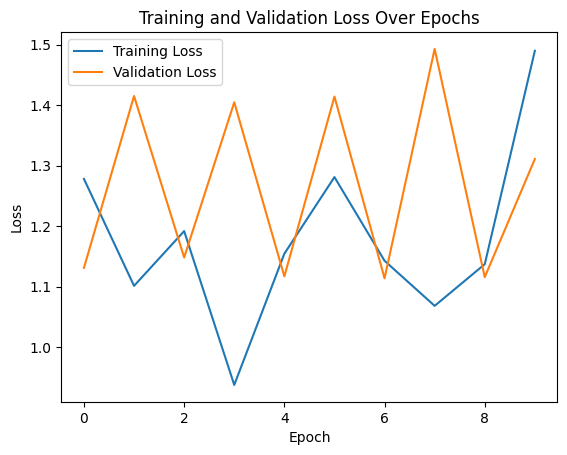

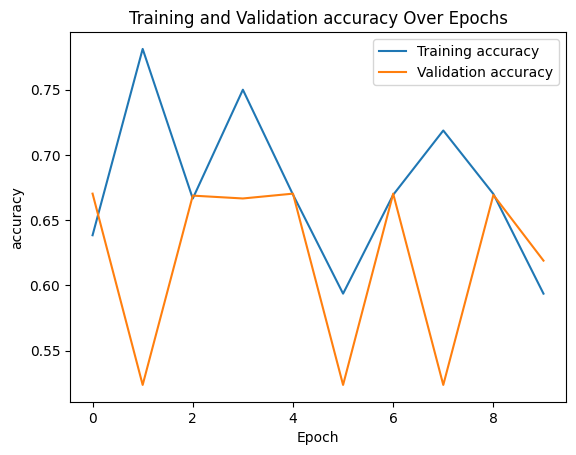

In [14]:
plot_metrics(history1)

In [26]:
base_model2 = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top
x2 = base_model2.output
x2 = GlobalAveragePooling2D()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.5)(x2)
predictions2 = Dense(train_generator.num_classes, activation='softmax')(x2)

# Create model
model2 = Model(inputs=base_model2.input, outputs=predictions2)

# Freeze the layers of the base model
for layer in base_model2.layers:
    layer.trainable = False

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(), Recall()])

# Callbacks
checkpoint = ModelCheckpoint('vgg19_best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history2 = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[checkpoint, early_stop])

# Evaluate the model
score2 = model2.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Validation Loss: {score2[0]}, Validation Accuracy: {score2[1]}")

Epoch 1/10
  1/187 ━━━━━━━━━━━━━━━━━━━━ 23:20 8s/step - accuracy: 0.1875 - loss: 1.9903 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00

W0000 00:00:1718087726.371888     285 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


180/187 ━━━━━━━━━━━━━━━━━━━━ 3s 456ms/step - accuracy: 0.6198 - loss: 1.3028 - precision_5: 0.6583 - recall_5: 0.4812

W0000 00:00:1718087808.020113     286 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.6213 - loss: 1.2984 - precision_5: 0.6592 - recall_5: 0.4849

W0000 00:00:1718087810.895094     287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 104s 520ms/step - accuracy: 0.6215 - loss: 1.2977 - precision_5: 0.6593 - recall_5: 0.4854 - val_accuracy: 0.6689 - val_loss: 1.0698 - val_precision_5: 0.6783 - val_recall_5: 0.6643
Epoch 2/10
  1/187 ━━━━━━━━━━━━━━━━━━━━ 28s 155ms/step - accuracy: 0.6562 - loss: 1.1714 - precision_5: 0.6562 - recall_5: 0.6562

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
W0000 00:00:1718087824.067475     287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6562 - loss: 1.1714 - precision_5: 0.6562 - recall_5: 0.6562 - val_accuracy: 0.7143 - val_loss: 0.9694 - val_precision_5: 0.7500 - val_recall_5: 0.7143
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 98s 509ms/step - accuracy: 0.6722 - loss: 1.0866 - precision_5: 0.7135 - recall_5: 0.6244 - val_accuracy: 0.6704 - val_loss: 1.0213 - val_precision_5: 0.7136 - val_recall_5: 0.6467
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8125 - loss: 0.7766 - precision_5: 0.8000 - recall_5: 0.7500 - val_accuracy: 0.8095 - val_loss: 0.7832 - val_precision_5: 0.8000 - val_recall_5: 0.7619
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 97s 502ms/step - accuracy: 0.6839 - loss: 1.0238 - precision_5: 0.7457 - recall_5: 0.6323 - val_accuracy: 0.6809 - val_loss: 0.9971 - val_precision_5: 0.7470 - val_recall_5: 0.6250
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5312 - loss: 1.2765 - precision_5: 0.6296 - recall_5: 0.5312 - val_

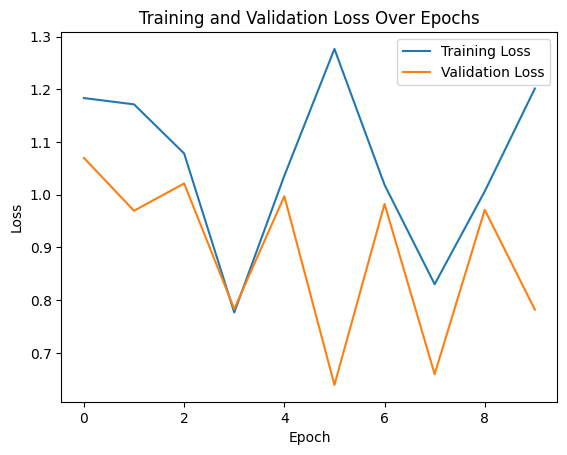

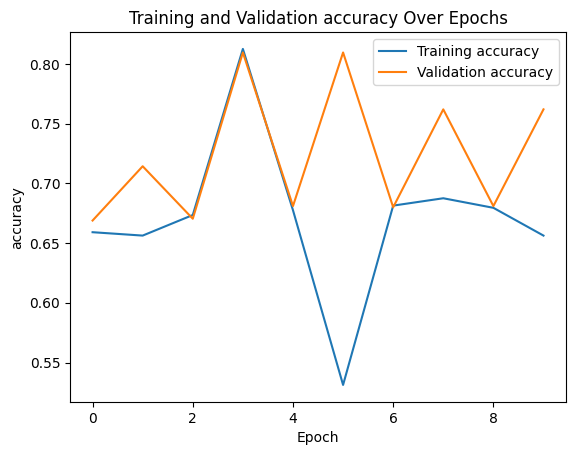

In [27]:
plot_metrics(history2)

In [28]:
#densenet 121 

base_model3 = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top
x3 = base_model3.output
x3 = GlobalAveragePooling2D()(x3)
x3 = Dense(1024, activation='relu')(x3)
x3 = Dropout(0.5)(x3)
predictions3 = Dense(train_generator.num_classes, activation='softmax')(x3)

# Create model
model3 = Model(inputs=base_model3.input, outputs=predictions3)

# Freeze the layers of the base model
for layer in base_model3.layers:
    layer.trainable = False

# Compile the model
model3.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(), Recall()])

# Callbacks
checkpoint = ModelCheckpoint('densenet121_best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history3 = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[checkpoint, early_stop])

# Evaluate the model
score3 = model3.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Validation Loss: {score3[0]}, Validation Accuracy: {score3[1]}")

Epoch 1/10
  2/187 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - accuracy: 0.1328 - loss: 2.2389 - precision_6: 0.0000e+00 - recall_6: 0.0000e+00  

W0000 00:00:1718088258.955382     285 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


119/187 ━━━━━━━━━━━━━━━━━━━━ 35s 520ms/step - accuracy: 0.5910 - loss: 1.3038 - precision_6: 0.6681 - recall_6: 0.4922

W0000 00:00:1718088320.253938     287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.6142 - loss: 1.2257 - precision_6: 0.6936 - recall_6: 0.5225

W0000 00:00:1718088357.958844     284 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 137s 600ms/step - accuracy: 0.6145 - loss: 1.2248 - precision_6: 0.6939 - recall_6: 0.5228 - val_accuracy: 0.6971 - val_loss: 0.8387 - val_precision_6: 0.8356 - val_recall_6: 0.6200
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6250 - loss: 0.9135 - precision_6: 0.7273 - recall_6: 0.5000 - val_accuracy: 0.6667 - val_loss: 1.0126 - val_precision_6: 0.6111 - val_recall_6: 0.5238
Epoch 3/10


W0000 00:00:1718088375.579146     286 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 98s 506ms/step - accuracy: 0.6949 - loss: 0.8588 - precision_6: 0.8110 - recall_6: 0.6185 - val_accuracy: 0.7238 - val_loss: 0.7858 - val_precision_6: 0.8569 - val_recall_6: 0.6129
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7812 - loss: 0.5933 - precision_6: 0.8571 - recall_6: 0.7500 - val_accuracy: 0.7619 - val_loss: 0.6135 - val_precision_6: 0.8750 - val_recall_6: 0.6667
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 96s 499ms/step - accuracy: 0.7110 - loss: 0.8121 - precision_6: 0.8231 - recall_6: 0.6263 - val_accuracy: 0.7278 - val_loss: 0.7581 - val_precision_6: 0.8441 - val_recall_6: 0.6361
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7812 - loss: 0.6924 - precision_6: 0.9167 - recall_6: 0.6875 - val_accuracy: 0.7619 - val_loss: 0.5831 - val_precision_6: 1.0000 - val_recall_6: 0.7619
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 97s 502ms/step - accuracy: 0.7153 - loss: 0.7794 - precision_6: 0.8375 - recall_6: 0.6245 - v

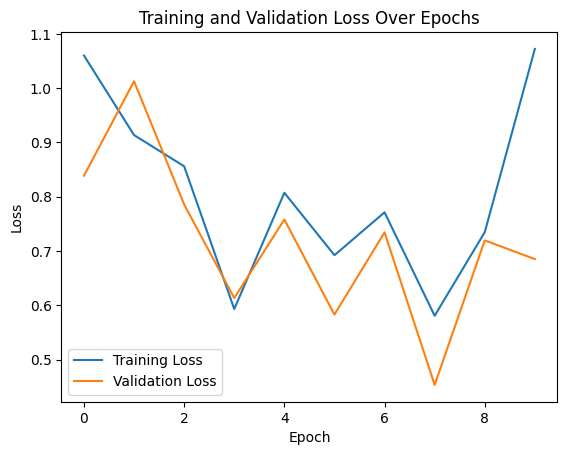

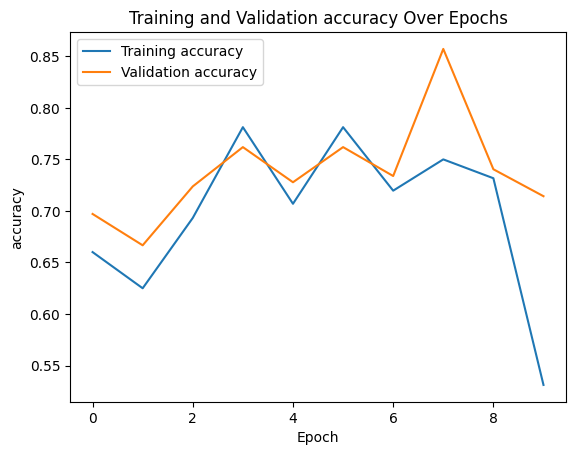

In [29]:
plot_metrics(history3)

In [30]:
#EfficientNetB0 
base_model4 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top
x4 = base_model4.output
x4 = GlobalAveragePooling2D()(x4)
x4 = Dense(1024, activation='relu')(x4)
x4 = Dropout(0.5)(x4)
predictions4 = Dense(train_generator.num_classes, activation='softmax')(x4)

# Create model
model4 = Model(inputs=base_model4.input, outputs=predictions4)

# Freeze the layers of the base model
for layer in base_model4.layers:
    layer.trainable = False

# Compile the model
model4.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(), Recall()])

# Callbacks
checkpoint = ModelCheckpoint('EfficientNetB0_best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history4 = model4.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[checkpoint, early_stop])

# Evaluate the model
score4 = model4.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Validation Loss: {score4[0]}, Validation Accuracy: {score4[1]}")

Epoch 1/10
  2/187 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.2266 - loss: 1.9187 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00   

W0000 00:00:1718088823.733085     287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 76/187 ━━━━━━━━━━━━━━━━━━━━ 1:13 659ms/step - accuracy: 0.6431 - loss: 1.5028 - precision_7: 0.5206 - recall_7: 0.1649

W0000 00:00:1718088873.070485     286 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


186/187 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.6591 - loss: 1.3515 - precision_7: 0.6121 - recall_7: 0.3670

W0000 00:00:1718088926.951444     286 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 148s 619ms/step - accuracy: 0.6592 - loss: 1.3501 - precision_7: 0.6127 - recall_7: 0.3691 - val_accuracy: 0.6694 - val_loss: 1.1350 - val_precision_7: 0.6694 - val_recall_7: 0.6694
Epoch 2/10
  1/187 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.6562 - loss: 1.1278 - precision_7: 0.6562 - recall_7: 0.6562

W0000 00:00:1718088941.883052     284 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6562 - loss: 1.1278 - precision_7: 0.6562 - recall_7: 0.6562 - val_accuracy: 0.6190 - val_loss: 1.0938 - val_precision_7: 0.6190 - val_recall_7: 0.6190
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 96s 496ms/step - accuracy: 0.6745 - loss: 1.1265 - precision_7: 0.6748 - recall_7: 0.6744 - val_accuracy: 0.6668 - val_loss: 1.1381 - val_precision_7: 0.6668 - val_recall_7: 0.6668
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6875 - loss: 0.9814 - precision_7: 0.6875 - recall_7: 0.6875 - val_accuracy: 0.8571 - val_loss: 0.7038 - val_precision_7: 0.8571 - val_recall_7: 0.8571
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 97s 501ms/step - accuracy: 0.6634 - loss: 1.1546 - precision_7: 0.6634 - recall_7: 0.6634 - val_accuracy: 0.6683 - val_loss: 1.1350 - val_precision_7: 0.6683 - val_recall_7: 0.6683
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.6562 - loss: 1.0584 - precision_7: 0.6562 - recall_7: 0.6562 - v

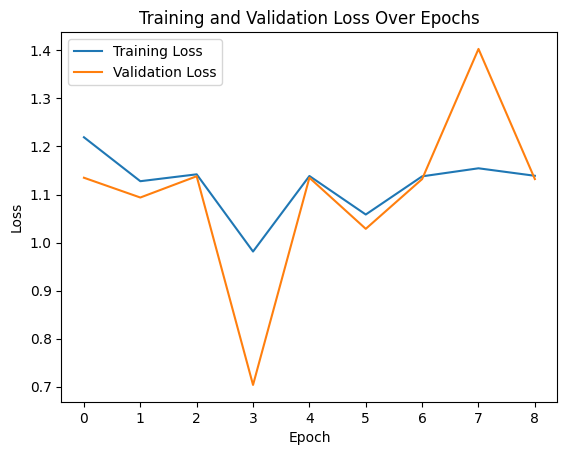

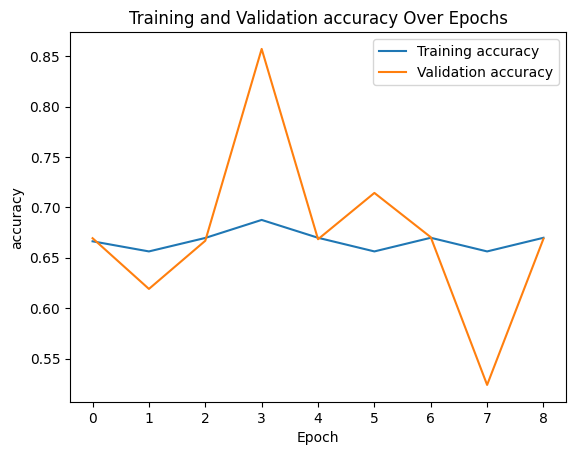

In [31]:
plot_metrics(history4)

In [32]:
#Xception 

base_model5 = Xception(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top
x5 = base_model5.output
x5 = GlobalAveragePooling2D()(x5)
x5 = Dense(1024, activation='relu')(x5)
x5 = Dropout(0.5)(x5)
predictions5 = Dense(train_generator.num_classes, activation='softmax')(x5)

# Create model
model5 = Model(inputs=base_model5.input, outputs=predictions5)

# Freeze the layers of the base model
for layer in base_model5.layers:
    layer.trainable = False

# Compile the model
model5.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(), Recall()])

# Callbacks
checkpoint = ModelCheckpoint('Xception_best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history5 = model5.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[checkpoint, early_stop])

# Evaluate the model
score5 = model5.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Validation Loss: {score5[0]}, Validation Accuracy: {score5[1]}")

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
  1/187 ━━━━━━━━━━━━━━━━━━━━ 1:23:44 27s/step - accuracy: 0.2500 - loss: 1.8132 - precision_8: 0.0000e+00 - recall_8: 0.0000e+00

W0000 00:00:1718089373.492221     286 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 67/187 ━━━━━━━━━━━━━━━━━━━━ 1:20 670ms/step - accuracy: 0.6268 - loss: 1.2368 - precision_8: 0.6782 - recall_8: 0.4801

W0000 00:00:1718089417.733511     286 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.6511 - loss: 1.1168 - precision_8: 0.7228 - recall_8: 0.5472

W0000 00:00:1718089474.451437     286 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 140s 608ms/step - accuracy: 0.6512 - loss: 1.1162 - precision_8: 0.7230 - recall_8: 0.5475 - val_accuracy: 0.6981 - val_loss: 0.8454 - val_precision_8: 0.8090 - val_recall_8: 0.6255
Epoch 2/10
  1/187 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - accuracy: 0.8125 - loss: 0.6149 - precision_8: 0.8519 - recall_8: 0.7188

W0000 00:00:1718089498.625693     287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.8125 - loss: 0.6149 - precision_8: 0.8519 - recall_8: 0.7188 - val_accuracy: 0.9524 - val_loss: 0.4474 - val_precision_8: 0.9474 - val_recall_8: 0.8571
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 99s 512ms/step - accuracy: 0.7026 - loss: 0.8415 - precision_8: 0.8072 - recall_8: 0.6237 - val_accuracy: 0.7314 - val_loss: 0.7815 - val_precision_8: 0.8228 - val_recall_8: 0.6462
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.7188 - loss: 0.7155 - precision_8: 0.9091 - recall_8: 0.6250 - val_accuracy: 0.5714 - val_loss: 1.0821 - val_precision_8: 0.7333 - val_recall_8: 0.5238
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 99s 511ms/step - accuracy: 0.7346 - loss: 0.7676 - precision_8: 0.8288 - recall_8: 0.6465 - val_accuracy: 0.7404 - val_loss: 0.7572 - val_precision_8: 0.8308 - val_recall_8: 0.6532
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.7500 - loss: 0.6541 - precision_8: 0.8077 - recall_8: 0.6562 

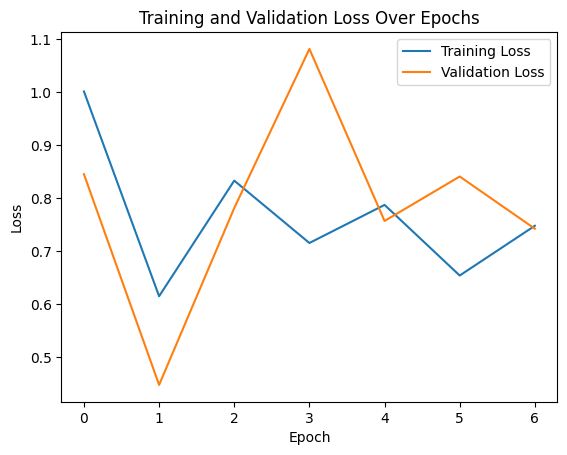

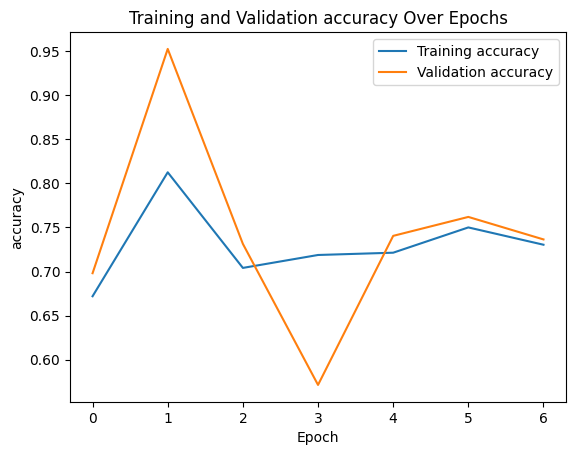

In [33]:
plot_metrics(history5)

In [34]:
#MobileNetV2
base_model6 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom layers on top
x6 = base_model6.output
x6 = GlobalAveragePooling2D()(x6)
x6 = Dense(1024, activation='relu')(x6)
x6 = Dropout(0.5)(x6)
predictions6 = Dense(train_generator.num_classes, activation='softmax')(x6)

# Create model
model6 = Model(inputs=base_model6.input, outputs=predictions6)

# Freeze the layers of the base model
for layer in base_model6.layers:
    layer.trainable = False

# Compile the model
model6.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(), Recall()])

# Callbacks
checkpoint = ModelCheckpoint('MobileNetV2_best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history6 = model6.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[checkpoint, early_stop])

# Evaluate the model
score6 = model6.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Validation Loss: {score6[0]}, Validation Accuracy: {score6[1]}")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
  1/187 ━━━━━━━━━━━━━━━━━━━━ 45:15 15s/step - accuracy: 0.0938 - loss: 2.4863 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00

W0000 00:00:1718089825.444767     284 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


123/187 ━━━━━━━━━━━━━━━━━━━━ 31s 496ms/step - accuracy: 0.6034 - loss: 1.2654 - precision_9: 0.6937 - recall_9: 0.5192

W0000 00:00:1718089885.905936     287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.6248 - loss: 1.1879 - precision_9: 0.7158 - recall_9: 0.5432

W0000 00:00:1718089917.013351     287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 118s 555ms/step - accuracy: 0.6250 - loss: 1.1870 - precision_9: 0.7161 - recall_9: 0.5435 - val_accuracy: 0.7107 - val_loss: 0.8196 - val_precision_9: 0.8237 - val_recall_9: 0.6406
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6875 - loss: 0.8775 - precision_9: 0.7778 - recall_9: 0.6562 - val_accuracy: 0.6190 - val_loss: 1.0249 - val_precision_9: 0.7647 - val_recall_9: 0.6190
Epoch 3/10


W0000 00:00:1718089932.581641     287 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


187/187 ━━━━━━━━━━━━━━━━━━━━ 97s 501ms/step - accuracy: 0.7071 - loss: 0.8391 - precision_9: 0.8122 - recall_9: 0.6318 - val_accuracy: 0.7344 - val_loss: 0.7708 - val_precision_9: 0.8393 - val_recall_9: 0.6290
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7500 - loss: 0.8723 - precision_9: 0.8400 - recall_9: 0.6562 - val_accuracy: 0.8571 - val_loss: 0.5335 - val_precision_9: 0.9375 - val_recall_9: 0.7143
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 96s 500ms/step - accuracy: 0.7381 - loss: 0.7674 - precision_9: 0.8253 - recall_9: 0.6545 - val_accuracy: 0.7485 - val_loss: 0.7547 - val_precision_9: 0.8469 - val_recall_9: 0.6467
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.6562 - loss: 0.9722 - precision_9: 0.7692 - recall_9: 0.6250 - val_accuracy: 0.7143 - val_loss: 0.7369 - val_precision_9: 0.7143 - val_recall_9: 0.4762
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 99s 514ms/step - accuracy: 0.7381 - loss: 0.7486 - precision_9: 0.8301 - recall_9: 0.6561 -

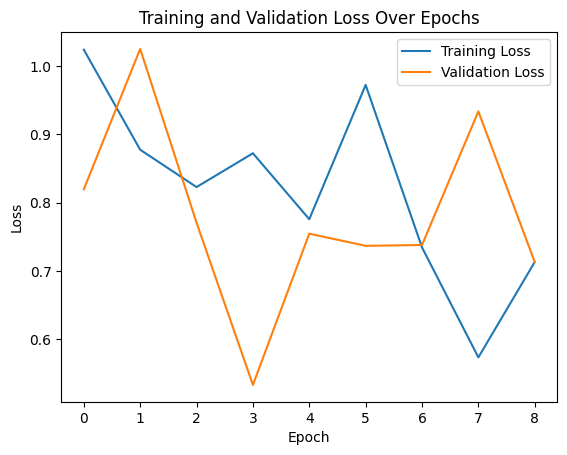

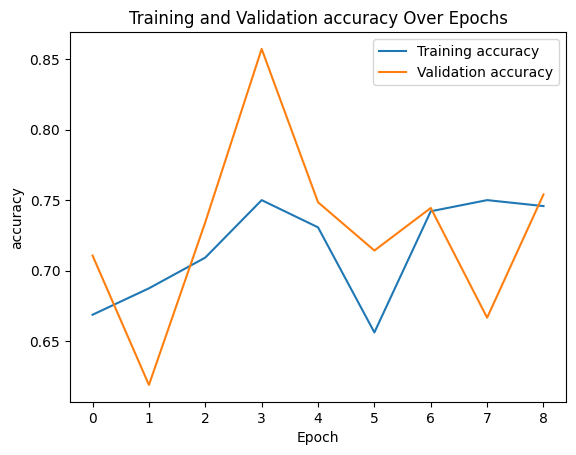

In [35]:
plot_metrics(history6)

In [36]:



resnet50_preds = model1.predict(test_generator, steps=test_generator.samples // batch_size, verbose=1)


vgg19_preds = model2.predict(test_generator, steps=test_generator.samples // batch_size, verbose=1)


densenet_121_preds = model3.predict(test_generator, steps=test_generator.samples // batch_size, verbose=1)

EfficientNetB0_preds = model4.predict(test_generator, steps=test_generator.samples // batch_size, verbose=1)

Xception_preds = model5.predict(test_generator, steps=test_generator.samples // batch_size, verbose=1)

MobileNetV2_preds = model6.predict(test_generator, steps=test_generator.samples // batch_size, verbose=1)


 2/62 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step

W0000 00:00:1718090474.541175     285 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 191ms/step
 2/62 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step 

W0000 00:00:1718090487.447409     284 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step
 1/62 ━━━━━━━━━━━━━━━━━━━━ 6:41 7s/step

W0000 00:00:1718090527.347711     284 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 185ms/step
 2/62 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step

W0000 00:00:1718090541.952034     285 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 185ms/step
 1/62 ━━━━━━━━━━━━━━━━━━━━ 3:17 3s/step

W0000 00:00:1718090556.824051     285 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 187ms/step


In [38]:
average_preds = (vgg19_preds + resnet50_preds + densenet_121_preds +EfficientNetB0_preds+Xception_preds+MobileNetV2_preds) / 6

# Convert probabilities to class labels
ensemble_preds = np.argmax(average_preds, axis=1)

# True labels
true_labels = test_generator.classes

In [39]:
correct = 0
wrong = 0
for actual , predicted in zip(true_labels,ensemble_preds):
    if actual == predicted:
        correct += 1
    else:
        wrong += 1
accuracy = (correct/len(ensemble_preds))*100
print(f"accuracy of ensemble model of un augmented data : {accuracy}% ")

accuracy of ensemble model of un augmented data : 67.59072580645162% 


In [21]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 619.0 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 5.2 MB/s eta 0:00:0000:0100:01


In [22]:
from ultralytics import YOLO
yolo_model = YOLO('/kaggle/input/yolov8-cls-models/yolov8s-cls.pt')  


In [24]:
yolo_model.train(
    data= '/kaggle/working/test_train_dataset',
    epochs=5,
    imgsz=224,
    batch=32,
    name='yolov8_classification'
)

Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=/kaggle/input/yolov8-cls-models/yolov8s-cls.pt, data=/kaggle/working/test_train_dataset, epochs=5, time=None, patience=100, batch=32, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_classification2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

2024-06-11 06:13:15,733	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-11 06:13:16,499	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=1000 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralyti

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 73.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/test_train_dataset/train... 6007 images, 0 corrupt: 100%|██████████| 6007/6007 [00:02<00:00, 2649.37it/s]

train: New cache created: /kaggle/working/test_train_dataset/train.cache



val: Scanning /kaggle/working/test_train_dataset/val... 2005 images, 0 corrupt: 100%|██████████| 2005/2005 [00:00<00:00, 4581.79it/s]

val: New cache created: /kaggle/working/test_train_dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/yolov8_classification2
Starting training for 5 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/5      0.77G      2.128         32        224:   3%|▎         | 6/188 [00:02<00:54,  3.32it/s]

        1/5      0.77G      2.128         32        224:   5%|▍         | 9/188 [00:03<00:57,  3.13it/s]
100%|██████████| 755k/755k [00:00<00:00, 16.0MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:11<00:00,  2.69it/s]

                   all      0.758      0.987



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:11<00:00,  2.78it/s]

                   all      0.795      0.994



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]

                   all      0.812      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]

                   all      0.842      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]

                   all      0.857      0.998



5 epochs completed in 0.084 hours.
Optimizer stripped from runs/classify/yolov8_classification2/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/yolov8_classification2/weights/best.pt, 10.3MB

Validating runs/classify/yolov8_classification2/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5084167 parameters, 0 gradients, 12.5 GFLOPs
train: /kaggle/working/test_train_dataset/train... found 6007 images in 7 classes ✅ 
val: /kaggle/working/test_train_dataset/val... found 2005 images in 7 classes ✅ 
test: /kaggle/working/test_train_dataset/test... found 2003 images in 7 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all      0.858      0.998
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/yolov8_classification2
Results saved to runs/classify/yolov8_classification2


lr/pg0,▃▇█▅▁
lr/pg1,▃▇█▅▁
lr/pg2,▃▇█▅▁
metrics/accuracy_top1,▁▄▅▇█
metrics/accuracy_top5,▁▅▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/loss,█▃▂▂▁
val/loss,█▆▅▁▁
lr/pg0,0.00015


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eae76562740>
curves: []
curves_results: []
fitness: 0.9279301762580872
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8578553795814514, 'metrics/accuracy_top5': 0.9980049729347229, 'fitness': 0.9279301762580872}
save_dir: PosixPath('runs/classify/yolov8_classification2')
speed: {'preprocess': 0.06938004434257374, 'inference': 0.3816246689109136, 'loss': 0.0002966854637697748, 'postprocess': 0.0003151168252464542}
task: 'classify'
top1: 0.8578553795814514
top5: 0.9980049729347229

In [25]:
from IPython.display import Image
yolo_metrics = yolo_model.val()


Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5084167 parameters, 0 gradients, 12.5 GFLOPs
train: /kaggle/working/test_train_dataset/train... found 6007 images in 7 classes ✅ 
val: /kaggle/working/test_train_dataset/val... found 2005 images in 7 classes ✅ 
test: /kaggle/working/test_train_dataset/test... found 2003 images in 7 classes ✅ 


val: Scanning /kaggle/working/test_train_dataset/val... 2005 images, 0 corrupt: 100%|██████████| 2005/2005 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 63/63 [00:12<00:00,  4.85it/s]


                   all      0.858      0.998
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/yolov8_classification22


In [41]:

history_dict1 = history1.history
history_dict2 = history2.history
history_dict3 = history3.history
history_dict4 = history4.history
history_dict5 = history5.history
history_dict6 = history6.history


# Get maximum accuracy and validation accuracy
max_train_accuracy1 = max(history_dict1['accuracy'])
max_val_accuracy1 = max(history_dict1['val_accuracy'])

max_train_accuracy2 = max(history_dict2['accuracy'])
max_val_accuracy2 = max(history_dict2['val_accuracy'])

max_train_accuracy3 = max(history_dict3['accuracy'])
max_val_accuracy3 = max(history_dict3['val_accuracy'])

max_train_accuracy4 = max(history_dict4['accuracy'])
max_val_accuracy4 = max(history_dict4['val_accuracy'])

max_train_accuracy5 = max(history_dict5['accuracy'])
max_val_accuracy5 = max(history_dict5['val_accuracy'])

max_train_accuracy6 = max(history_dict6['accuracy'])
max_val_accuracy6 = max(history_dict6['val_accuracy'])


print(f"Maximum training accuracy vgg19: {max_train_accuracy1 * 100:.2f}%")
print(f"Maximum validation accuracy vgg19: {max_val_accuracy1 * 100:.2f}%")

print("")

print(f"Maximum training accuracy resnet50: {max_train_accuracy2 * 100:.2f}%")
print(f"Maximum validation accuracy resnet50: {max_val_accuracy2 * 100:.2f}%")

print("")

print(f"Maximum training accuracy densenet_121: {max_train_accuracy3 * 100:.2f}%")
print(f"Maximum validation accuracy densenet_121: {max_val_accuracy3 * 100:.2f}%")

print("")

print(f"Maximum training accuracy EfficientNetB0: {max_train_accuracy4 * 100:.2f}%")
print(f"Maximum validation accuracy EfficientNetB0: {max_val_accuracy4 * 100:.2f}%")

print("")

print(f"Maximum training accuracy Xception: {max_train_accuracy5 * 100:.2f}%")
print(f"Maximum validation accuracy Xception: {max_val_accuracy5 * 100:.2f}%")

print("")

print(f"Maximum training accuracy MobileNetV2: {max_train_accuracy6 * 100:.2f}%")
print(f"Maximum validation accuracy MobileNetV2: {max_val_accuracy6 * 100:.2f}%")

print("")


print(f"accuracy of yolov8 classification model of  data : {yolo_metrics.top1}% ")

print("")
print(f"accuracy of ensemble model of  data : {accuracy}% ")

Maximum training accuracy vgg19: 78.12%
Maximum validation accuracy vgg19: 67.04%

Maximum training accuracy resnet50: 81.25%
Maximum validation accuracy resnet50: 80.95%

Maximum training accuracy densenet_121: 78.12%
Maximum validation accuracy densenet_121: 85.71%

Maximum training accuracy EfficientNetB0: 68.75%
Maximum validation accuracy EfficientNetB0: 85.71%

Maximum training accuracy Xception: 81.25%
Maximum validation accuracy Xception: 95.24%

Maximum training accuracy MobileNetV2: 75.00%
Maximum validation accuracy MobileNetV2: 85.71%

accuracy of yolov8 classification model of  data : 0.8583540916442871% 

accuracy of ensemble model of  data : 67.59072580645162% 
